# Pokemon Dataset

This is an analysis of the [Pokemon Dataset](https://www.kaggle.com/rajgaurav9/pokemon-stats-and-description-with-pictures-json#pokemon_full.json) found on Kaggle. Lets start by import any libraries that we will need and the data.

In [12]:
import json
import re
import matplotlib.pyplot as plt
import numpy as np

pokemons = json.load(open('pokemon_full.json'))

## What does the data look like

First lets see what each entry looks like.

In [2]:
pokemons[0]

{'id': '001',
 'name': 'Bulbasaur',
 'species': 'Seed Pokemon',
 'type': ['Grass', 'Poison'],
 'height': '2ft.4in. (0.71m)',
 'weight': '15.2 lbs (6.9 kg)',
 'abilities': ['Overgrow', 'Chlorophyll'],
 'stats': {'hp': 45,
  'attack': 49,
  'defense': 49,
  'sp.atk': 65,
  'sp.def': 65,
  'speed': 45,
  'total': 318},
 'evolution': ['Bulbasaur', 'Ivysaur', 'Venusaur'],
 'description': 'For some time after its birth, it grows by gaining nourishment from the seed on its back.',
 'gen': 1}

Also, lets check the last element to see if anything changed from the first pokemon to the last pokemon.

In [3]:
pokemons[800]

{'name': 'Magearna',
 'species': 'Artificial Pokemon',
 'id': '801',
 'type': ['Steel', 'Fairy'],
 'height': '(1m)',
 'weight': '(80.5 kg)',
 'abilities': ['Soul-Heart'],
 'stats': {'hp': 80,
  'attack': 95,
  'defense': 115,
  'sp.atk': 130,
  'sp.def': 115,
  'speed': 65,
  'total': 600},
 'evolution': [],
 'description': '',
 'gen': 7}

Some things to notice are that the heights are not always stored as feet and inches so it will be best to just use the meter heights. Also, not all pokemon have a description and evolutions are not recorded for every pokemon.

## Number of Pokemon in Each Generation

In [4]:
generations = [pokemon['gen'] for pokemon in pokemons]

Text(0.5, 1.0, 'Total Number of Pokemon in Each Generation')

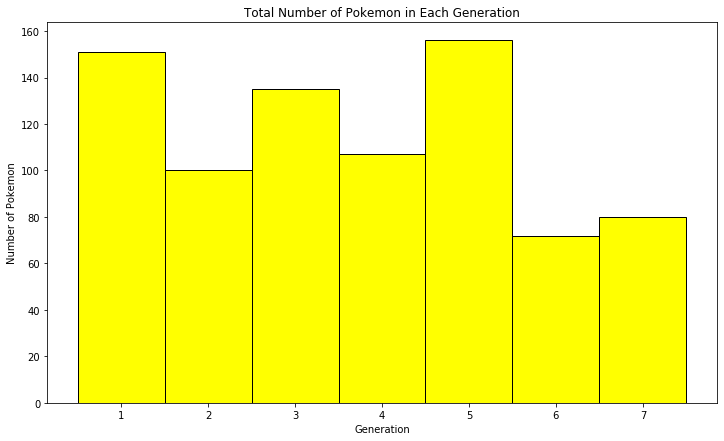

In [5]:
plt.figure(figsize=(12, 7))
plt.hist(generations, bins=(range(1, 9)), align='left', edgecolor='black', color='yellow')
plt.xlabel("Generation")
plt.ylabel("Number of Pokemon")
plt.title("Total Number of Pokemon in Each Generation")

So we can see that Gen 6 has the least amount of pokemon while Gen 5 had the most.

## Heights of Pokemon

In [6]:
def clean_height(string):
    split_heights = string.split(" ")
    if len(split_heights) == 2:
        meter_height = split_heights[1]
    else:
        meter_height = split_heights[0]
    
    meter_height = re.sub("[^0-9.]+", '', meter_height).strip()
    return meter_height

heights = []
for pokemon in pokemons:
    height = pokemon['height']
    height = clean_height(height)
    if height == '':
        height = 0.0
    else:
        height = float(height)
    heights.append(height)
    
heights[0:10]

[0.71, 0.99, 2.01, 0.61, 1.09, 1.7, 0.51, 0.99, 1.6, 0.3]

Text(0, 0.5, 'Number of Pokemon')

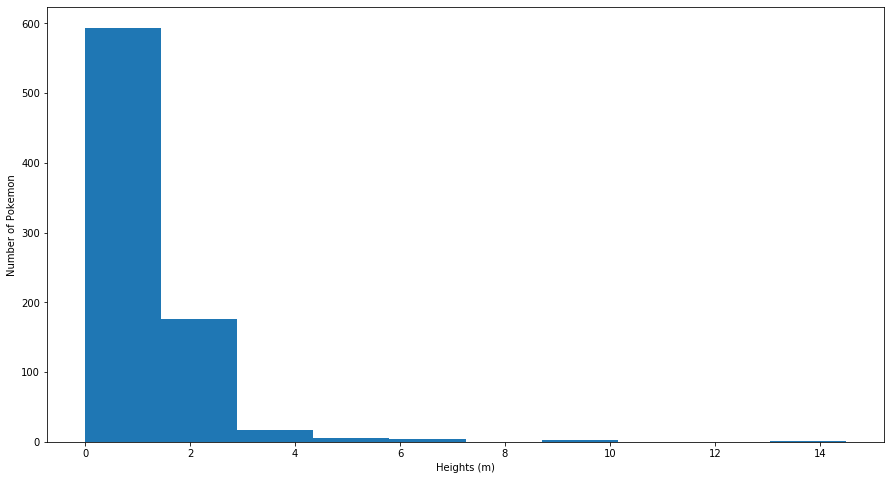

In [26]:
plt.figure(figsize=(15, 8))
plt.hist(heights)
plt.xlabel("Heights (m)")
plt.ylabel("Number of Pokemon")

So there seems to be some outliers that is skewing our data so lets see what it looks like without them.

In [8]:
height_without_outliers = [height for height in heights if height < 3]

Text(0.5, 1.0, 'Number of Pokemon at each height')

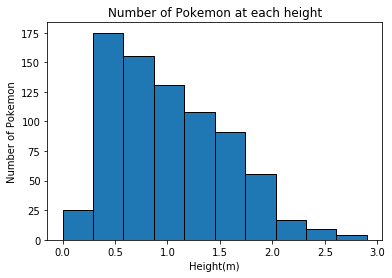

In [27]:
plt.hist(height_without_outliers, edgecolor='black')
plt.xlabel("Height(m)")
plt.ylabel("Number of Pokemon")
plt.title("Number of Pokemon at each height")

## Height vs Health

Lets see if height plays a role in how healthy a pokemon is. Since we will need to see if how much a role height plays in hp we will have to use the polyfit function from numpy and create some arrays also. Below we are isolating the hp and then converting both hp and height into arrays for use in polyfit. Polyfit allows us to calculate the m and b in the y=mx+b equation.

In [18]:
hp = [pokemon['stats']['hp'] for pokemon in pokemons]

np_heights = np.array(heights)
np_hp = np.array(hp)
m,b = np.polyfit(np_heights, hp, 1)

Text(0.5, 1.0, 'Height and HP in Pokemon')

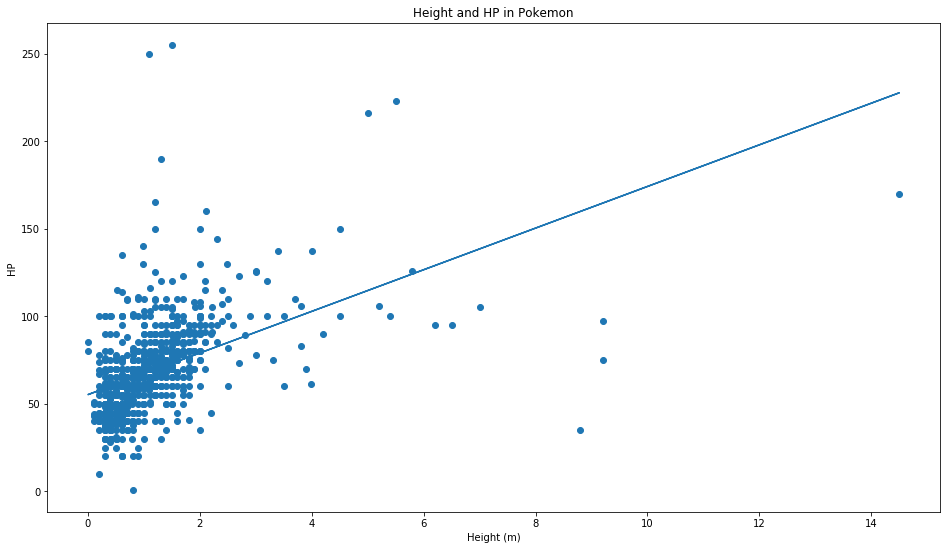

In [21]:
plt.figure(figsize=(16, 9))
plt.scatter(heights, hp)
plt.plot(np_heights, m*np_heights+b)
plt.xlabel("Height (m)")
plt.ylabel("HP")
plt.title("Height and HP in Pokemon")

So we can see above that there is some sort of positive relationship between height and hp in pokemon but lets see how much of a relationship. We will use the pearsonr function to show the correlation coefficient for the relationship between heights and hp. Remember that it should be above 0.5 to be considered a good correlation and the closer to 1.0 it is the better.

In [25]:
import scipy.stats as sp
corr, _ = sp.pearsonr(heights, hp)
corr

0.47904336821189425